In [1]:
import numpy as np
import skimage.io as io
import skfuzzy as fuzz
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
# Vanishing line detection
def detect_vanishing_line(Ir_image):
    # Perform vanishing line detection using the normal distribution
    # Return the vanishing line coordinates
    gray=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    edges=cv.Canny(gray,50,150,apertureSize=3)
    lines = cv.HoughLines(edges, 1, np.pi/180, 200)
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img1,(x1,y1),(x2,y2),(0,0,255),1)
    return Ir_image

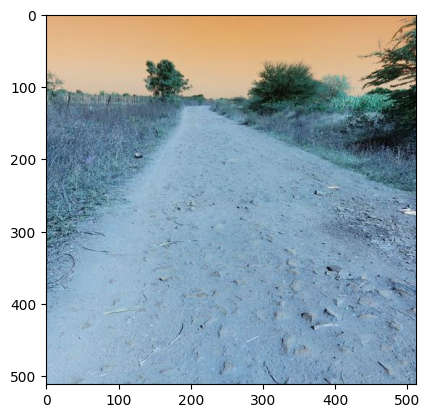

In [3]:
img1 = cv.imread('Image12.jpg')
plt.imshow(img1)

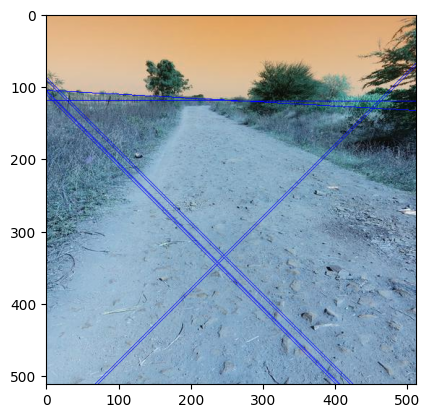

In [4]:
vanishing_img=detect_vanishing_line(img1)
plt.imshow(vanishing_img)

In [7]:
# Load the image
#image = cv.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale
#image_gray = io.imread('Image12.jpg', as_gray=True)

image_gray = cv.cvtColor(vanishing_img, cv.COLOR_BGR2GRAY)

# Ensure single-dimensional entries are removed
image_gray = np.squeeze(image_gray)

# Print shape information for debugging
print('Image shape:', vanishing_img.shape)
print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
image_data = np.reshape(image_gray, (-1, 1))

# Print shape information for debugging
print('Image data shape:', image_data.shape)


# Set the number of clusters (desired segments)
num_clusters =5

# Set the fuzziness parameter
m = 2.0

# Apply Possibilistic C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data.T, num_clusters, m, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape
segmented_image = membership_degrees.reshape(image_gray.shape)

# Calculate combined map
combined_map = np.max(u, axis=0)

# Reshape the combined map to match the shape of the original image
combined_map = combined_map.reshape(image_gray.shape)

Image shape: (512, 512, 3)
Grayscale image shape: (512, 512)
Image data shape: (262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 1)
(5, 262144)
(262144, 

C:\Users\ksais\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


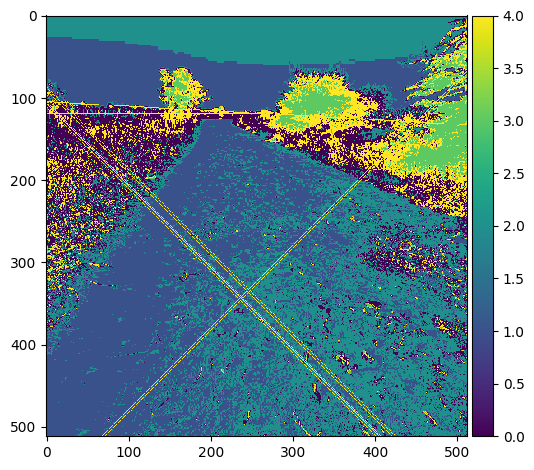

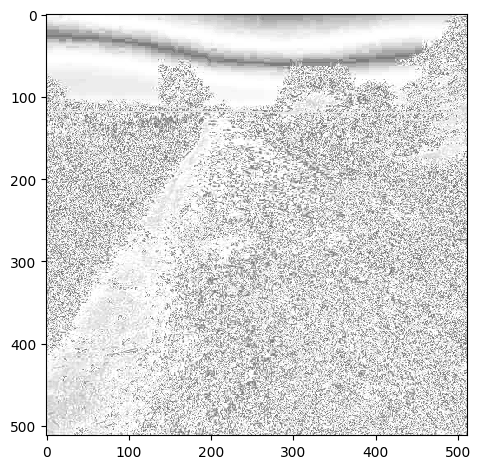

In [8]:
# Display the segmented image
io.imshow(segmented_image)
io.show()

# Display the combined map
io.imshow(combined_map)
io.show()